## PART 1

In [3]:
import numpy as np
import random

### Пошук максимального підмасиву

In [ ]:
data = np.random.randint(10, size=1000)

In [14]:
# Пошук максимального підмасиву
# 1
def find_max_subarray_brute(arr):
    n = len(arr)
    max_sum = float('-inf')
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            max_sum = max(max_sum, current_sum)
    return max_sum

In [18]:
%%timeit

find_max_subarray_brute(data)

289 ms ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# 2
def find_max_subarray_divide(arr):
    if len(arr) == 1:
        return arr[0]
    mid = len(arr) // 2
    left_sum = find_max_subarray_divide(arr[:mid])
    right_sum = find_max_subarray_divide(arr[mid:])
    
    # Знаходження максимальної суми, що перетинає середину
    left_crossing = float('-inf')
    current = 0
    for i in range(mid-1, -1, -1):
        current += arr[i]
        left_crossing = max(left_crossing, current)
    
    right_crossing = float('-inf')
    current = 0
    for i in range(mid, len(arr)):
        current += arr[i]
        right_crossing = max(right_crossing, current)
    
    crossing_sum = left_crossing + right_crossing
    return max(left_sum, right_sum, crossing_sum)

In [19]:
%%timeit

find_max_subarray_divide(data)

17.7 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Алгоритми що базуються на Divide & Conquer

| Алгоритм                         | Опис                              | Складність                    |
| -------------------------------- | --------------------------------- | ----------------------------- |
| **MergeSort**                    | Сортування злиттям                | O(n log n)                    |
| **QuickSort**                    | Швидке сортування                 | O(n log n) (середній випадок) |
| **Strassen’s Algorithm**         | Швидке множення матриць           | O(n^2.81)                     |
| **Karatsuba Algorithm**          | Множення великих чисел            | O(n^log₂3)                    |
| **Closest Pair of Points**       | Знаходження двох найближчих точок | O(n log n)                    |
| **Fast Fourier Transform (FFT)** | Аналіз сигналів                   | O(n log n)                    |

In [ ]:
### Каратсуба

CPU times: user 24.8 ms, sys: 12.6 ms, total: 37.4 ms
Wall time: 39.8 ms


np.int64(4530)

In [ ]:
# O(n^log2(3)
def karatsuba(x, y):
    if x < 10 or y < 10:  # Базовий випадок
        return x * y

    n = max(len(str(x)), len(str(y)))
    m = n // 2

    a, b = divmod(x, 10**m)
    c, d = divmod(y, 10**m)

    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    ad_plus_bc = karatsuba(a + b, c + d) - ac - bd

    return ac * 10**(2*m) + ad_plus_bc * 10**m + bd




In [28]:
x_float, y_float = 0.12345678, 0.87654321
x, y = 12345678, 87654321

In [69]:
%%timeit

x * y

142 ns ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [70]:
%%timeit

x_float * y_float

111 ns ± 8.03 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [73]:
%%timeit

karatsuba(x, y)


68.4 μs ± 11.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [72]:
%%timeit

karatsuba(x_float, y_float)

343 ns ± 64.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Python під капотом для операції множення використовує різні алгоритми, оптимізовані для різних типів даних та ситуацій. Розглянемо детальніше:

1. Цілі числа (int):

- Для малих чисел: Python використовує вбудовані операції процесора для швидкого множення. Це дуже ефективно для чисел, що поміщаються в машинне слово.

- Для великих чисел (bignums): Python підтримує цілі числа довільної довжини. Для множення великих чисел використовуються спеціалізовані алгоритми, такі як алгоритм Карацуби або алгоритм Шьонхагера-Штрассена. Вибір алгоритму залежить від розміру чисел.


2. Числа з плаваючою крапкою (float):

- Python використовує стандарт IEEE 754 для представлення чисел з плаваючою крапкою. Множення таких чисел виконується за допомогою вбудованих операцій процесора, які відповідають стандарту IEEE 754.


3. Комплексні числа (complex):

- Множення комплексних чисел виконується за правилами комплексної арифметики. Python реалізує ці правила за допомогою відповідних алгоритмів.


4. Інші типи даних:

Д- ля інших типів даних, таких як списки, кортежі або матриці, операція множення може бути перевизначена. Наприклад, множення списку на число може призвести до повторення елементів списку.

### FFT

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


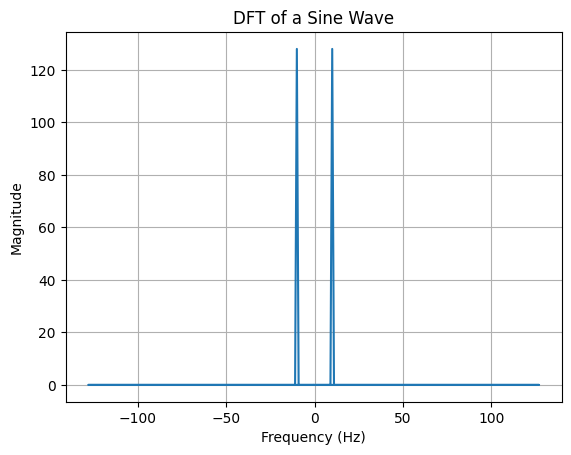

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    """
    Discrete Fourier Transform (DFT) of a 1D signal.

    Args:
        x: A 1D numpy array representing the input signal.

    Returns:
        A 1D numpy array representing the DFT coefficients.
    """
    N = len(x)  # Length of the input signal
    X = np.zeros(N, dtype=complex)  # Initialize DFT output array with complex zeros

    for k in range(N):  # Iterate over output frequencies (0 to N-1)
        for n in range(N):  # Iterate over input time samples (0 to N-1)
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)

    return X


# Example usage:
x = np.array([1, 2, 3, 4])  # Example input signal
X = dft(x)
print(X)

# Verification (compare with numpy's fft):
X_np = np.fft.fft(x)
print(X_np)  # Should be very close to the custom DFT result

# Another Example (a sine wave)
import matplotlib.pyplot as plt
N = 256
t = np.linspace(0, 1, N, False)  # 1 second
x = np.sin(2*np.pi*10*t) # 10 Hz sine wave

X = dft(x)
freq = np.fft.fftfreq(N, 1/N) # Get the frequencies corresponding to the DFT output
plt.plot(freq, np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("DFT of a Sine Wave")
plt.grid()
plt.show()

In [74]:
def fft(x):
    n = len(x)
    if n == 1:
        return x

    w = np.exp(-2j * np.pi / n)  # Комплексний множник
    even = fft(x[::2])
    odd = fft(x[1::2])

    return [even[k] + w**k * odd[k] for k in range(n//2)] + \
           [even[k] - w**k * odd[k] for k in range(n//2)]



In [85]:
N = 256
t = np.linspace(0, 1, N, False)  # 1 second
x = np.sin(2*np.pi*10*t) # 10 Hz sine wave

In [86]:
%%time
# x = np.array([0, 1, 2, 3])
dft(x)

CPU times: user 1.5 s, sys: 98.8 ms, total: 1.6 s
Wall time: 1.67 s


array([-6.93889390e-16+0.00000000e+00j,  5.19029264e-15+2.90913127e-15j,
        4.16333634e-16+3.85108612e-16j,  8.65973959e-15-1.05818132e-15j,
        3.10862447e-15+2.24126273e-15j,  8.43769499e-15-4.27088920e-15j,
       -4.08006962e-15+1.79647963e-14j,  7.18869408e-15-3.82333054e-15j,
        3.69149156e-15+7.19563298e-15j,  6.38378239e-16+6.93889390e-17j,
       -3.60822483e-15-1.28000000e+02j,  1.55431223e-14+1.22374333e-13j,
        4.80171458e-15-4.16333634e-16j,  2.20101715e-14-3.84414722e-14j,
       -2.53685961e-14-1.94289029e-14j,  5.77038417e-14+4.19941859e-14j,
       -2.60069744e-14+2.42861287e-15j, -1.83186799e-14-1.33226763e-14j,
       -1.80411242e-15+5.78703752e-15j,  1.78745907e-14-6.13398221e-15j,
        1.11577414e-14-2.70616862e-15j, -2.78110868e-14-1.28785871e-14j,
        0.00000000e+00+2.55073740e-14j,  4.82947016e-15-2.03725925e-14j,
        1.69031455e-14+2.37865283e-14j, -1.15463195e-14-1.05748743e-14j,
       -1.02140518e-14-8.35442826e-15j,  8.43769499

In [87]:
%%time
# x = np.array([0, 1, 2, 3])
fft(x)

CPU times: user 6.89 ms, sys: 19.1 ms, total: 25.9 ms
Wall time: 25.8 ms


[np.complex128(5.443494292722948e-15+0j),
 np.complex128(7.935581282989063e-15+5.2989642142553205e-15j),
 np.complex128(-1.9253591957763886e-16+4.383195324699642e-15j),
 np.complex128(1.0283038701545142e-14+9.16342430141753e-16j),
 np.complex128(9.328619004730948e-15+8.803762887753347e-15j),
 np.complex128(4.988034856843803e-15+6.297554697755513e-15j),
 np.complex128(3.175034980105726e-15+1.834975077702326e-14j),
 np.complex128(7.2149394254251e-16+9.090651004910145e-15j),
 np.complex128(6.6607146323330475e-15+1.9740036145995093e-14j),
 np.complex128(-2.6793973146561937e-15+4.637278684785484e-14j),
 np.complex128(-1.4467226452483694e-13-128.00000000000006j),
 np.complex128(3.9159735243114126e-15-5.418455910245378e-14j),
 np.complex128(6.078368511501247e-15-2.5894144794032263e-14j),
 np.complex128(8.934381294333394e-15-1.508710129672178e-14j),
 np.complex128(-1.44027322959133e-15-3.156529661070202e-15j),
 np.complex128(2.1919279354778782e-14-1.724363317304468e-14j),
 np.complex128(6.0537

## PART 2

| Концепція            | Жадібні алгоритми     | Динамічне програмування |
| -------------------- | --------------------- | ----------------------- |
| **Штучний інтелект** | A* Search             | Reinforcement Learning  |
| **Графи**            | MST (Prim, Kruskal)   | Floyd-Warshall          |
| **Мережі**           | Load Balancing        | Flow Algorithms         |
| **Криптографія**     | RSA, Huffman Coding   | Exponentiation          |
| **Фінанси**          | Алгоритмічна торгівля | Оптимізація ризиків     |

## COMPEX INSTANCES

## LEGACY

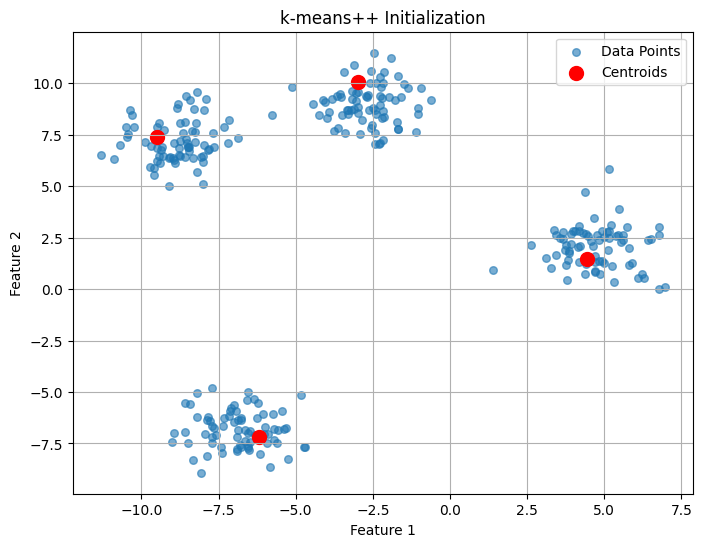

In [91]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# Step 1: Generate synthetic data
def generate_data(n_samples=300, n_features=2, n_clusters=4, cluster_std=1.0, random_state=42):
    data, labels = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=cluster_std, n_features=n_features, random_state=random_state)
    return data

# Step 2: Implement k-means++ initialization
def kmeans_plus_plus(data, k, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = data.shape

    # Randomly select the first centroid
    centroids = [data[np.random.choice(range(n_samples))]]

    # Select the remaining k-1 centroids
    for _ in range(1, k):
        # Compute the distance from each point to the nearest centroid
        distances = np.min(cdist(data, np.array(centroids)), axis=1)
        probabilities = distances / distances.sum()

        # Choose the next centroid probabilistically
        next_centroid_idx = np.random.choice(range(n_samples), p=probabilities)
        centroids.append(data[next_centroid_idx])

    return np.array(centroids)

# Step 3: Plot the data and centroids for visualization
def plot_clusters(data, centroids, title="k-means++ Initialization"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=30, alpha=0.6, label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label="Centroids")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
n_samples = 300
n_features = 2
n_clusters = 4

# Generate data
data = generate_data(n_samples=n_samples, n_features=n_features, n_clusters=n_clusters)

# Perform k-means++ initialization
centroids = kmeans_plus_plus(data, n_clusters)

# Visualize results
plot_clusters(data, centroids, title="k-means++ Initialization")



In [95]:

import numpy as np
import pandas as pd

# Step 1: Generate synthetic data for movies
def generate_movie_data(n_movies=10, max_budget=100, max_popularity=5, max_views=50000, random_state=333):
    np.random.seed(random_state)
    budgets = np.random.randint(10, max_budget, size=n_movies)
    popularity = np.random.uniform(1, max_popularity, size=n_movies)
    views = (popularity * max_views / max_popularity).astype(int)
    movies = pd.DataFrame({
        "Movie_ID": range(1, n_movies + 1),
        "Budget": budgets,
        "Popularity": popularity,
        "Projected_Views": views
    })
    return movies

# Step 2: Dynamic programming approach for maximizing views
def maximize_views_with_budget(movies, total_budget):
    n_movies = len(movies)
    dp = np.zeros((n_movies + 1, total_budget + 1), dtype=int)

    for i in range(1, n_movies + 1):
        for b in range(1, total_budget + 1):
            if movies.loc[i - 1, "Budget"] > b:
                dp[i][b] = dp[i - 1][b]  # Exclude the movie
            else:
                # Include the movie and check maximum
                dp[i][b] = max(dp[i - 1][b],
                               dp[i - 1][b - movies.loc[i - 1, "Budget"]] + movies.loc[i - 1, "Projected_Views"])

    # Retrieve selected movies
    selected_movies = []
    b = total_budget
    for i in range(n_movies, 0, -1):
        if dp[i][b] != dp[i - 1][b]:  # If the movie is included
            selected_movies.append(movies.loc[i - 1, "Movie_ID"])
            b -= movies.loc[i - 1, "Budget"]

    return dp[n_movies][total_budget], selected_movies

# Step 3: Generate data and solve the problem
n_movies = 10
total_budget = 150

# Generate movie data
movies = generate_movie_data(n_movies=n_movies)

# Solve the optimization problem
max_views, selected_movies = maximize_views_with_budget(movies, total_budget)

max_views, selected_movies

(np.int64(107327), [np.int64(10), np.int64(8), np.int64(5), np.int64(1)])

In [94]:
movies.sort_values(by='Projected_Views')

,Movie_ID,Budget,Popularity,Projected_Views
8,9,81,1.129436,11294
7,8,39,1.134617,11346
2,3,45,2.270715,22707
9,10,33,2.280310,22803
0,1,22,2.455686,24556
5,6,70,2.874055,28740
3,4,61,3.350593,33505
6,7,93,3.520203,35202
4,5,56,4.862282,48622
1,2,87,4.871972,48719


In [96]:

# Step 1: Generate synthetic data for server programs
def generate_server_programs(n_programs=15, max_cpu=100, max_ram=200, random_state=333):
    np.random.seed(random_state)
    programs = pd.DataFrame({
        "Program_ID": range(1, n_programs + 1),
        "CPU_Usage": np.random.randint(5, max_cpu // 2, size=n_programs),
        "RAM_Usage": np.random.randint(10, max_ram // 2, size=n_programs),
        "Priority": np.random.uniform(1, 10, size=n_programs)  # Weight in the system
    })
    return programs

# Step 2: Greedy approach for resource allocation
def greedy_resource_allocation(programs, max_cpu, max_ram):
    # Calculate resource efficiency (CPU + RAM per unit of Priority)
    programs["Efficiency"] = (programs["CPU_Usage"] + programs["RAM_Usage"]) / programs["Priority"]
    programs = programs.sort_values(by="Efficiency")  # Sort by efficiency

    selected_programs = []
    total_cpu, total_ram = 0, 0

    for _, program in programs.iterrows():
        if total_cpu + program["CPU_Usage"] <= max_cpu and total_ram + program["RAM_Usage"] <= max_ram:
            selected_programs.append(program["Program_ID"])
            total_cpu += program["CPU_Usage"]
            total_ram += program["RAM_Usage"]

    return selected_programs, total_cpu, total_ram

# Correcting the data type for indexing in DP array (integer conversion)
def dp_resource_allocation(programs, max_cpu, max_ram):
    n_programs = len(programs)
    dp = np.zeros((n_programs + 1, max_cpu + 1, max_ram + 1), dtype=float)

    for i in range(1, n_programs + 1):
        program = programs.iloc[i - 1]
        cpu, ram, priority = int(program["CPU_Usage"]), int(program["RAM_Usage"]), program["Priority"]

        for c in range(max_cpu + 1):
            for r in range(max_ram + 1):
                if cpu > c or ram > r:
                    dp[i][c][r] = dp[i - 1][c][r]  # Exclude program
                else:
                    # Include program if resources allow
                    dp[i][c][r] = max(dp[i - 1][c][r],
                                      dp[i - 1][c - cpu][r - ram] + priority)

    # Backtrack to find selected programs
    selected_programs = []
    c, r = max_cpu, max_ram
    for i in range(n_programs, 0, -1):
        if dp[i][c][r] != dp[i - 1][c][r]:  # If program was included
            selected_programs.append(programs.iloc[i - 1]["Program_ID"])
            c -= int(programs.iloc[i - 1]["CPU_Usage"])
            r -= int(programs.iloc[i - 1]["RAM_Usage"])

    return selected_programs, dp[n_programs][max_cpu][max_ram]

# Parameters
n_programs = 300
max_cpu = 150
max_ram = 300

# Generate program data
programs = generate_server_programs(n_programs=n_programs)


In [103]:
%%time
# Solve using greedy approach
greedy_selected, greedy_cpu, greedy_ram = greedy_resource_allocation(programs, max_cpu, max_ram)



# Display results
greedy_results = {
    "Selected Programs (Greedy)": greedy_selected,
    "Total CPU Used": greedy_cpu,
    "Total RAM Used": greedy_ram
}

greedy_results


CPU times: user 63.7 ms, sys: 0 ns, total: 63.7 ms
Wall time: 63.4 ms


{'Selected Programs (Greedy)': [np.float64(46.0),
  np.float64(109.0),
  np.float64(111.0),
  np.float64(82.0),
  np.float64(32.0),
  np.float64(80.0),
  np.float64(209.0),
  np.float64(228.0),
  np.float64(102.0),
  np.float64(60.0),
  np.float64(58.0),
  np.float64(172.0),
  np.float64(81.0),
  np.float64(84.0)],
 'Total CPU Used': np.float64(149.0),
 'Total RAM Used': np.float64(252.0)}

In [102]:
greedy_results

{'Selected Programs (Greedy)': [np.float64(46.0),
  np.float64(109.0),
  np.float64(111.0),
  np.float64(82.0),
  np.float64(32.0),
  np.float64(80.0),
  np.float64(209.0),
  np.float64(228.0),
  np.float64(102.0),
  np.float64(60.0),
  np.float64(58.0),
  np.float64(172.0),
  np.float64(81.0),
  np.float64(84.0)],
 'Total CPU Used': np.float64(149.0),
 'Total RAM Used': np.float64(252.0)}

In [98]:

%%time
# Solve using dynamic programming (corrected)
dp_selected, dp_priority = dp_resource_allocation(programs, max_cpu, max_ram)

dp_results = {
    "Selected Programs (DP)": dp_selected,
    "Total Priority Achieved": dp_priority
}



CPU times: user 1min 11s, sys: 209 ms, total: 1min 12s
Wall time: 1min 12s


In [101]:
dp_results

{'Selected Programs (DP)': [np.float64(266.0),
  np.float64(239.0),
  np.float64(228.0),
  np.float64(209.0),
  np.float64(146.0),
  np.float64(111.0),
  np.float64(109.0),
  np.float64(102.0),
  np.float64(88.0),
  np.float64(82.0),
  np.float64(80.0),
  np.float64(60.0),
  np.float64(58.0),
  np.float64(46.0),
  np.float64(32.0)],
 'Total Priority Achieved': np.float64(124.56718385255489)}